# Load the dataset and filter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("project_dataset.csv", parse_dates=["Date"])
df

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,0,1.0,24924.50,42.31,2.572,211.096358,8.106
1,2010-02-05,0,26.0,11737.12,42.31,2.572,211.096358,8.106
2,2010-02-05,0,17.0,13223.76,42.31,2.572,211.096358,8.106
3,2010-02-05,0,45.0,37.44,42.31,2.572,211.096358,8.106
4,2010-02-05,0,28.0,1085.29,42.31,2.572,211.096358,8.106
...,...,...,...,...,...,...,...,...
10239,2012-10-26,0,13.0,38512.48,69.16,3.506,223.444251,6.573
10240,2012-10-26,0,93.0,66622.89,69.16,3.506,223.444251,6.573
10241,2012-10-26,0,48.0,3341.00,69.16,3.506,223.444251,6.573
10242,2012-10-26,0,95.0,117375.38,69.16,3.506,223.444251,6.573


In [2]:
# Filter by department ID
dept_id = 16
df_dept = df[df['Dept'] == dept_id].copy()
df_dept.set_index("Date", inplace=True)
df_dept.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,0,16.0,10217.55,42.31,2.572,211.096358,8.106
2010-02-12,1,16.0,11873.89,38.51,2.548,211.242170,8.106
2010-02-19,0,16.0,13855.54,39.93,2.514,211.289143,8.106
2010-02-26,0,16.0,12881.02,46.63,2.561,211.319643,8.106
2010-03-05,0,16.0,17129.81,46.50,2.625,211.350143,8.106


# Data Exploration

In [3]:
# Basic info
print(f"Dataset shape: {df_dept.shape}")

Dataset shape: (143, 7)


In [4]:
print(f"Date range: {df_dept.index.min()} to {df_dept.index.max()}")

Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00


In [5]:
print(f"Missing values: {df_dept.isnull().sum().sum()}")

Missing values: 0


In [6]:
print(f"Weekly Sales Statistics:\n")
print(df_dept['Weekly_Sales'].describe())

Weekly Sales Statistics:

count      143.000000
mean     24151.061329
std      15457.022600
min       4594.950000
25%      10292.265000
50%      21143.580000
75%      37825.005000
max      59543.220000
Name: Weekly_Sales, dtype: float64


# Visualization

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import datetime

In [8]:
# Identify and analyze trends
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df_dept.index, y=df_dept['Weekly_Sales'],mode='lines', name='Weekly Sales')
    )
fig.update_layout(title='Weekly Sales Trend', xaxis_title='Date', yaxis_title='Weekly Sales')
fig.show()

This plot shows a clear seasonal trend
in weekly sales from early 2010 to late 2012. Sales spike significantly around the beginning of each year, followed by a sharp decline and then smaller fluctuations. This suggests that sales are highest during the early months and then taper off

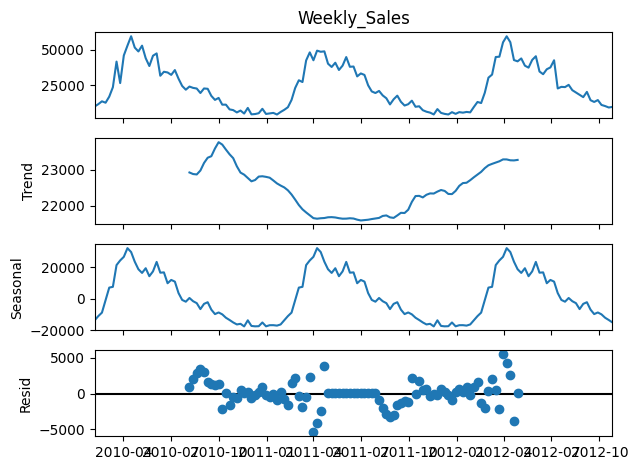

In [9]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition =seasonal_decompose(df_dept['Weekly_Sales'], model='additive', period=52)

decomposition.plot()
plt.show()

The data shows strong, predictable seasonality and a shifting trend in sales over time. Most of the variation can be explained by the trend and seasonal components, with relatively low random noise

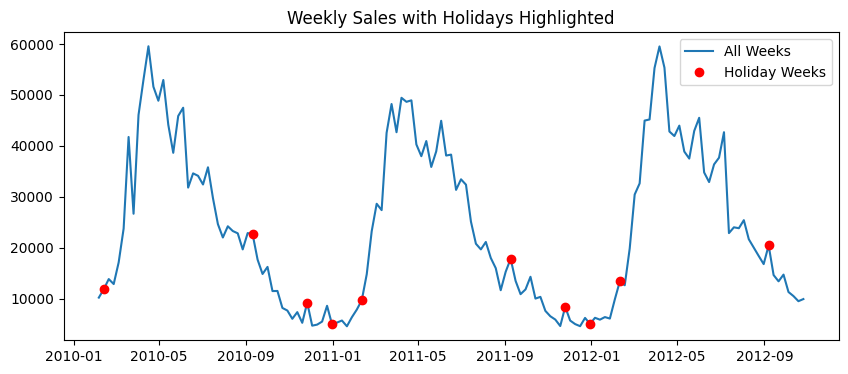

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(df_dept.index, df_dept["Weekly_Sales"], label="All Weeks")
plt.plot(df_dept[df_dept["IsHoliday"] == 1].index, df_dept[df_dept["IsHoliday"] == 1]["Weekly_Sales"],
         'ro', label="Holiday Weeks")
plt.title("Weekly Sales with Holidays Highlighted")
plt.legend()
plt.show()


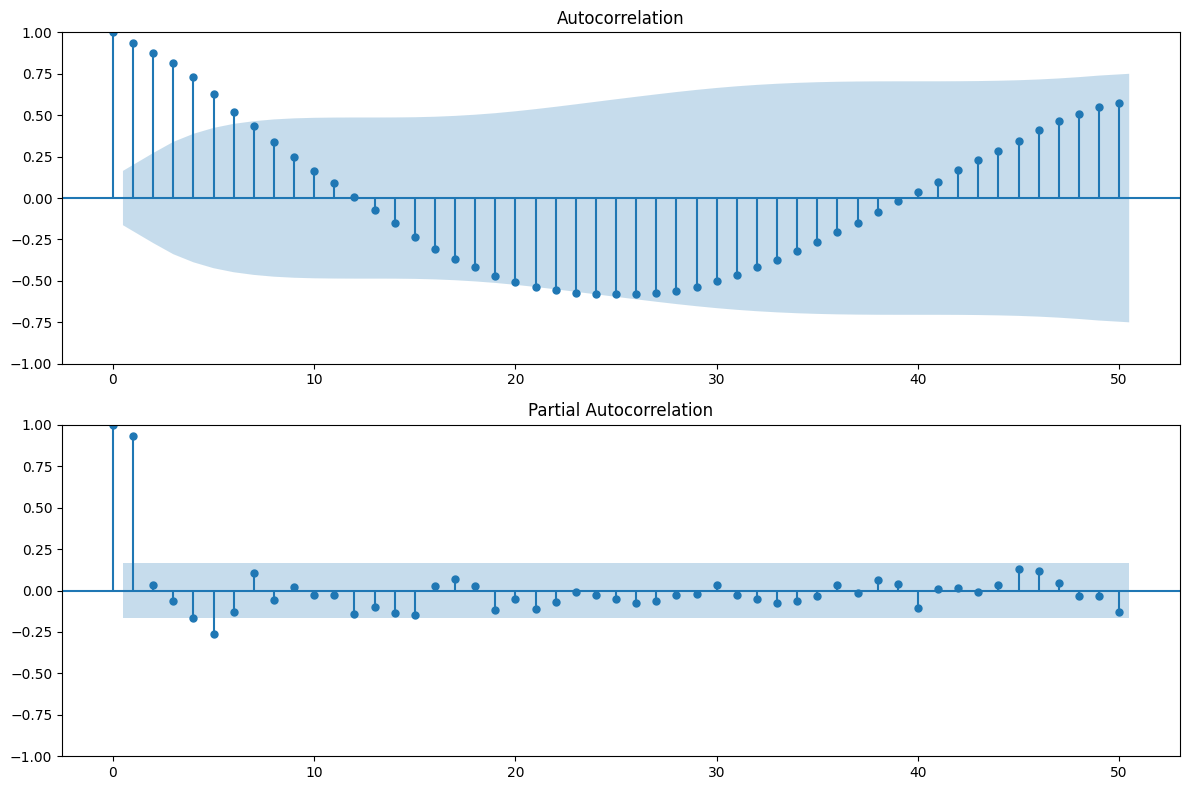

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_dept['Weekly_Sales'], ax=ax1, lags=50)
plot_pacf(df_dept['Weekly_Sales'], ax=ax2, lags=50)
plt.tight_layout()
plt.show()

**Ace:**
This plot shows how the current value of weekly sales is correlated with its past values.

 The gradual decay and cyclical pattern suggest strong seasonality and non-stationarity in the data. High positive correlation at lag 1 that slowly decreases indicates that past values significantly influence future ones.




**PACF:** This plot shows the direct correlation between weekly sales and its past values, removing the influence of intermediate lags. A strong spike at lag 1 and smaller spikes at early lags suggest that a few previous weeks have a direct effect on the current value, pointing toward a possible autoregressive behavior.

In [12]:
# Stationarity Testing
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is non-stationary")

check_stationarity(df_dept['Weekly_Sales'])

ADF Statistic: -3.518634702439525
p-value: 0.007521215817497338
Critical Values:
	1%: -3.479007355368944
	5%: -2.8828782366015093
	10%: -2.5781488587564603
Series is stationary


# Exponential Smoothing

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [14]:
df_sales = df_dept['Weekly_Sales'].copy()
df_sales.head()

,Weekly_Sales
Date,
2010-02-05,10217.55
2010-02-12,11873.89
2010-02-19,13855.54
2010-02-26,12881.02
2010-03-05,17129.81


In [15]:
# Split into train and test sets
train_size = int(len(df_sales) * 0.8)
train, test = df_sales[:train_size], df_sales[train_size:]

In [16]:
# Print train and teat sizes
print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 114, Test size: 29


In [17]:
print("Train:")
print(train.head())
print("\nTest:")
print(test.head())

Train:
Date
2010-02-05    10217.55
2010-02-12    11873.89
2010-02-19    13855.54
2010-02-26    12881.02
2010-03-05    17129.81
Name: Weekly_Sales, dtype: float64

Test:
Date
2012-04-13    55347.73
2012-04-20    42816.54
2012-04-27    41926.36
2012-05-04    43970.70
2012-05-11    38885.33
Name: Weekly_Sales, dtype: float64


## Holt’s Linear Trend Model

In [18]:
# Fit the model
holt_model = Holt(train).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



In [19]:
# Forecast
holt_forecast = holt_model.forecast(len(test))

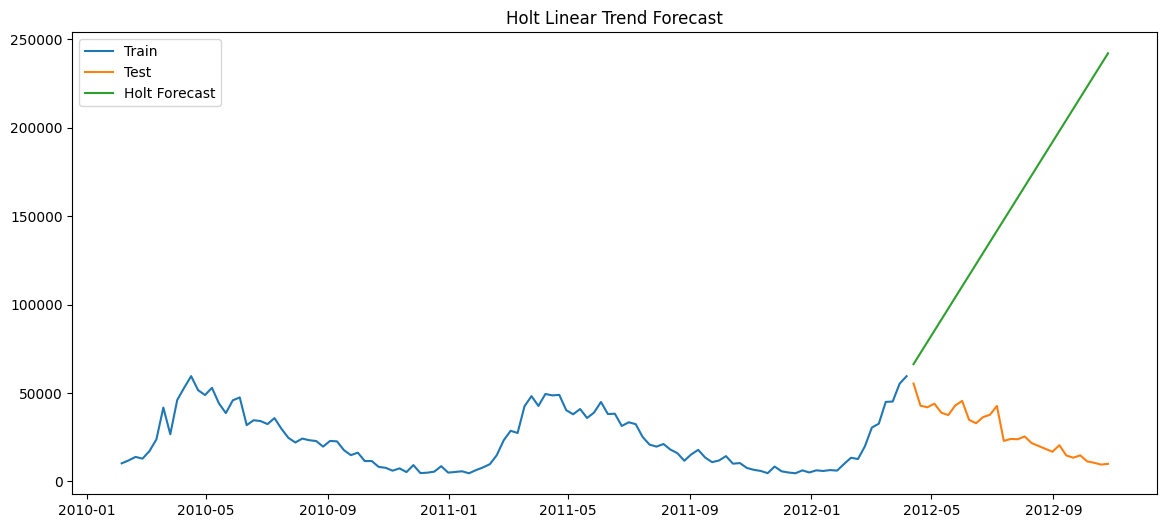

In [20]:
# Plot results
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, holt_forecast, label='Holt Forecast')
plt.title('Holt Linear Trend Forecast')
plt.legend()
plt.show()

In [21]:
# Evaluation
holt_rmse = math.sqrt(mean_squared_error(test, holt_forecast))
holt_mae = mean_absolute_error(test, holt_forecast)
print(f"Holt RMSE: {holt_rmse:.2f}, MAE: {holt_mae:.2f}")

Holt RMSE: 142018.64, MAE: 126281.87


## Holt-Winters Seasonal Model

In [22]:
# Fit the model
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=52).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [23]:
# Forecast
hw_forecast = hw_model.forecast(len(test))

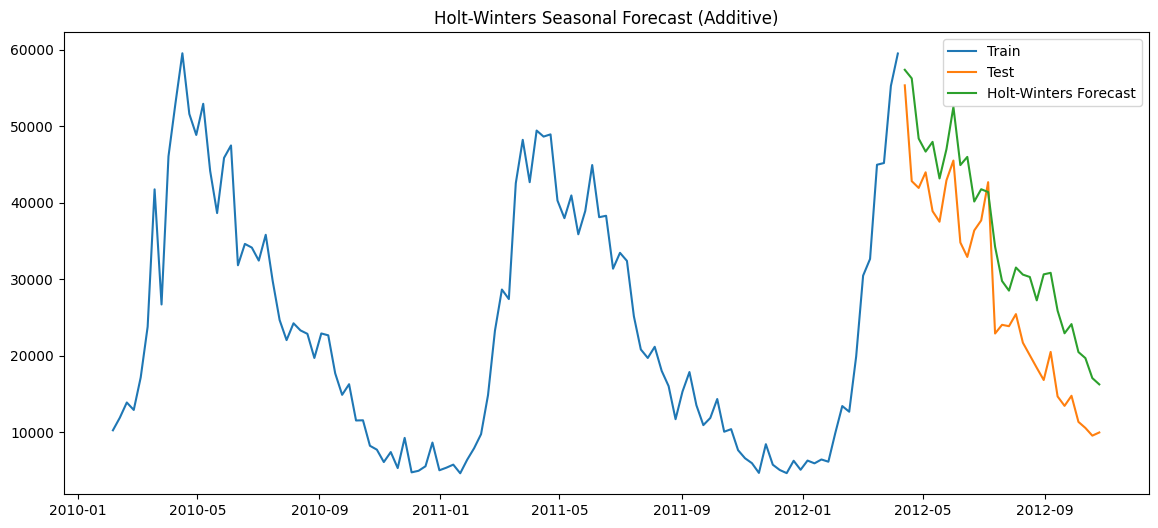

In [24]:
# Plot results
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast')
plt.title('Holt-Winters Seasonal Forecast (Additive)')
plt.legend()
plt.show()

In [25]:
# Evaluation
hw_rmse = math.sqrt(mean_squared_error(test, hw_forecast))
hw_mae = mean_absolute_error(test, hw_forecast)
print(f"Holt-Winters RMSE: {hw_rmse:.2f}, MAE: {hw_mae:.2f}")

Holt-Winters RMSE: 8445.69, MAE: 7758.80


# ARIMA Family Models

In [26]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

## ARIMA

In [27]:
# Fit ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1)).fit()

In [28]:
# Forecast
arima_forecast = arima_model.forecast(steps=len(test))

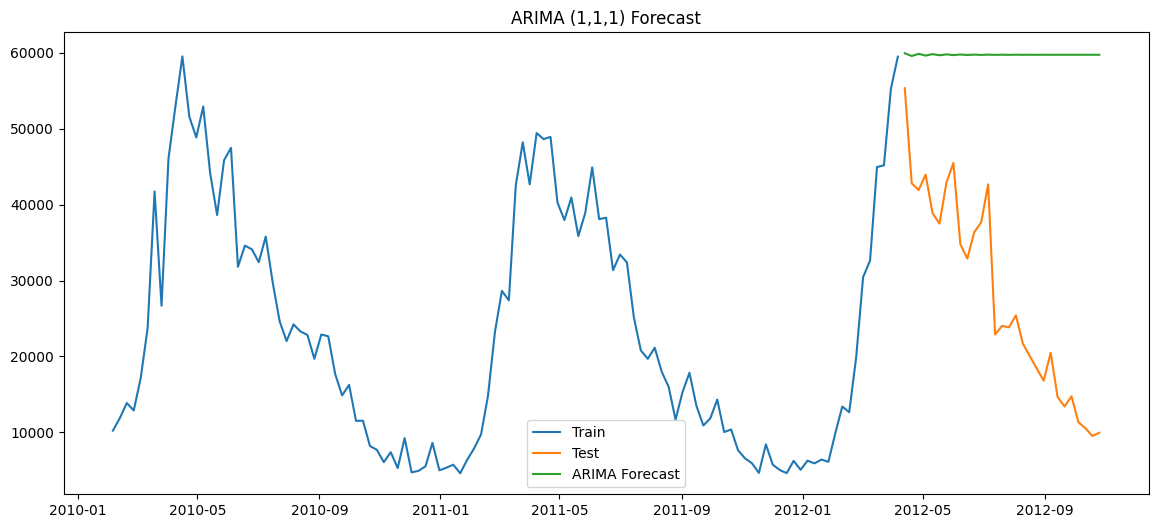

In [29]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA (1,1,1) Forecast')
plt.legend()
plt.show()

In [30]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

arima_rmse = math.sqrt(mean_squared_error(test, arima_forecast))
arima_mae = mean_absolute_error(test, arima_forecast)
print(f"ARIMA RMSE: {arima_rmse:.2f}, MAE: {arima_mae:.2f}")

ARIMA RMSE: 34332.86, MAE: 31799.63


## SARIMA Model

In [31]:
# Fit the model
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52)).fit()

In [32]:
# Forecast
sarima_forecast = sarima_model.forecast(steps=len(test))

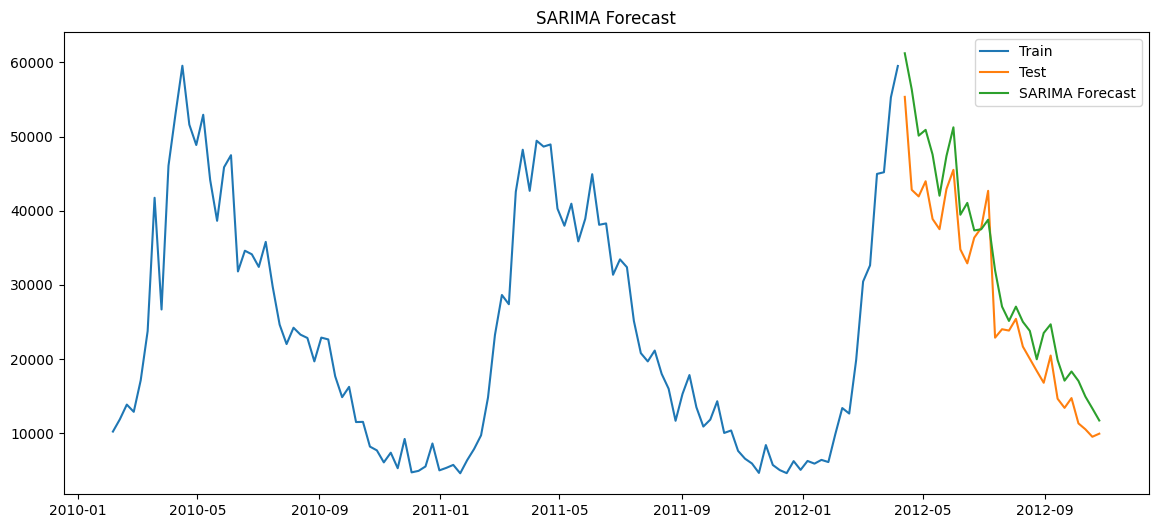

In [33]:
# Visualize
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [34]:
# Evaluate
sarima_rmse = math.sqrt(mean_squared_error(test, sarima_forecast))
sarima_mae = mean_absolute_error(test, sarima_forecast)
print(f"SARIMA RMSE: {sarima_rmse:.2f}, MAE: {sarima_mae:.2f}")

SARIMA RMSE: 5559.46, MAE: 4782.66


## SARIMAX Model

In [35]:
# Get external regressors
exog_train = df_dept.loc[train.index, ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
exog_test = df_dept.loc[test.index, ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

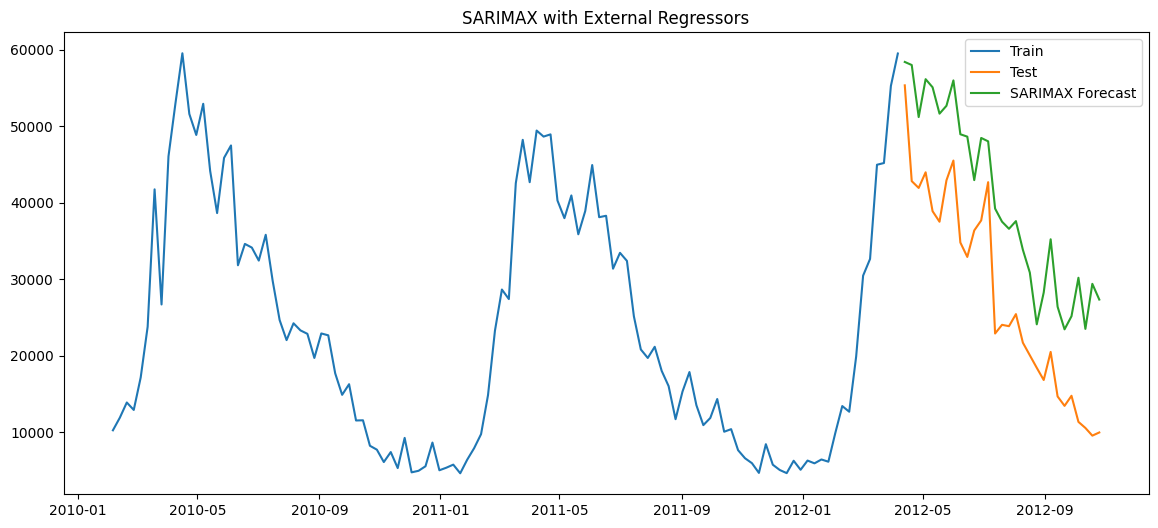

SARIMAX RMSE: 12798.19, MAE: 12196.87


In [36]:
sarimax_model = SARIMAX(train,
                        exog=exog_train,
                        order=(1,1,1),
                        seasonal_order=(1,1,1,52)).fit()

sarimax_forecast = sarimax_model.forecast(steps=len(test), exog=exog_test)

plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, sarimax_forecast, label='SARIMAX Forecast')
plt.title('SARIMAX with External Regressors')
plt.legend()
plt.show()

sarimax_rmse = math.sqrt(mean_squared_error(test, sarimax_forecast))
sarimax_mae = mean_absolute_error(test, sarimax_forecast)
print(f"SARIMAX RMSE: {sarimax_rmse:.2f}, MAE: {sarimax_mae:.2f}")


In [37]:
df_dept.columns

Index(['IsHoliday', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

## Feature Engineering

In [38]:
# Time-Based Features
df_ml = df_dept.copy()
df_ml['week'] = df_ml.index.isocalendar().week
df_ml['Month'] = df_ml.index.month
df_ml['Year'] = df_ml.index.year

df_ml.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,Month,Year
Date,,,,,,,,,,
2010-02-05,0,16.0,10217.55,42.31,2.572,211.096358,8.106,5,2,2010
2010-02-12,1,16.0,11873.89,38.51,2.548,211.242170,8.106,6,2,2010
2010-02-19,0,16.0,13855.54,39.93,2.514,211.289143,8.106,7,2,2010
2010-02-26,0,16.0,12881.02,46.63,2.561,211.319643,8.106,8,2,2010
2010-03-05,0,16.0,17129.81,46.50,2.625,211.350143,8.106,9,3,2010


In [39]:
# Lag Features
for i in range(1, 4):
    df_ml[f'Weekly_Sales_Lag_{i}'] = df_ml['Weekly_Sales'].shift(i)

df_ml.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,Month,Year,Weekly_Sales_Lag_1,Weekly_Sales_Lag_2,Weekly_Sales_Lag_3
Date,,,,,,,,,,,,,
2010-02-05,0,16.0,10217.55,42.31,2.572,211.096358,8.106,5,2,2010,NaN,NaN,NaN
2010-02-12,1,16.0,11873.89,38.51,2.548,211.242170,8.106,6,2,2010,10217.55,NaN,NaN
2010-02-19,0,16.0,13855.54,39.93,2.514,211.289143,8.106,7,2,2010,11873.89,10217.55,NaN
2010-02-26,0,16.0,12881.02,46.63,2.561,211.319643,8.106,8,2,2010,13855.54,11873.89,10217.55
2010-03-05,0,16.0,17129.81,46.50,2.625,211.350143,8.106,9,3,2010,12881.02,13855.54,11873.89


In [40]:
df_ml.tail()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,Month,Year,Weekly_Sales_Lag_1,Weekly_Sales_Lag_2,Weekly_Sales_Lag_3
Date,,,,,,,,,,,,,
2012-09-28,0,16.0,14734.64,76.08,3.666,222.981658,6.908,39,9,2012,13415.51,14646.37,20473.94
2012-10-05,0,16.0,11320.41,68.55,3.617,223.181477,6.573,40,10,2012,14734.64,13415.51,14646.37
2012-10-12,0,16.0,10525.66,62.99,3.601,223.381296,6.573,41,10,2012,11320.41,14734.64,13415.51
2012-10-19,0,16.0,9518.43,67.97,3.594,223.425723,6.573,42,10,2012,10525.66,11320.41,14734.64
2012-10-26,0,16.0,9934.63,69.16,3.506,223.444251,6.573,43,10,2012,9518.43,10525.66,11320.41


In [41]:
# Rolling Window Statistics
df_ml['Weekly_Sales_Rolling_Mean'] = df_ml['Weekly_Sales'].rolling(window=4).mean()
df_ml['Weekly_Sales_Rolling_Std'] = df_ml['Weekly_Sales'].rolling(window=4).std()

df_ml.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,Month,Year,Weekly_Sales_Lag_1,Weekly_Sales_Lag_2,Weekly_Sales_Lag_3,Weekly_Sales_Rolling_Mean,Weekly_Sales_Rolling_Std
Date,,,,,,,,,,,,,,,
2010-02-05,0,16.0,10217.55,42.31,2.572,211.096358,8.106,5,2,2010,NaN,NaN,NaN,NaN,NaN
2010-02-12,1,16.0,11873.89,38.51,2.548,211.242170,8.106,6,2,2010,10217.55,NaN,NaN,NaN,NaN
2010-02-19,0,16.0,13855.54,39.93,2.514,211.289143,8.106,7,2,2010,11873.89,10217.55,NaN,NaN,NaN
2010-02-26,0,16.0,12881.02,46.63,2.561,211.319643,8.106,8,2,2010,13855.54,11873.89,10217.55,12207.000,1553.583027
2010-03-05,0,16.0,17129.81,46.50,2.625,211.350143,8.106,9,3,2010,12881.02,13855.54,11873.89,13935.065,2278.316124


In [42]:
# Expanding Window Statistics
df_ml['Weekly_Sales_Cumulative_Sum'] = df_ml['Weekly_Sales'].expanding().sum()

df_ml.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,Month,Year,Weekly_Sales_Lag_1,Weekly_Sales_Lag_2,Weekly_Sales_Lag_3,Weekly_Sales_Rolling_Mean,Weekly_Sales_Rolling_Std,Weekly_Sales_Cumulative_Sum
Date,,,,,,,,,,,,,,,,
2010-02-05,0,16.0,10217.55,42.31,2.572,211.096358,8.106,5,2,2010,NaN,NaN,NaN,NaN,NaN,10217.55
2010-02-12,1,16.0,11873.89,38.51,2.548,211.242170,8.106,6,2,2010,10217.55,NaN,NaN,NaN,NaN,22091.44
2010-02-19,0,16.0,13855.54,39.93,2.514,211.289143,8.106,7,2,2010,11873.89,10217.55,NaN,NaN,NaN,35946.98
2010-02-26,0,16.0,12881.02,46.63,2.561,211.319643,8.106,8,2,2010,13855.54,11873.89,10217.55,12207.000,1553.583027,48828.00
2010-03-05,0,16.0,17129.81,46.50,2.625,211.350143,8.106,9,3,2010,12881.02,13855.54,11873.89,13935.065,2278.316124,65957.81


In [43]:
df_ml.dropna(inplace=True)
df_ml.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,Month,Year,Weekly_Sales_Lag_1,Weekly_Sales_Lag_2,Weekly_Sales_Lag_3,Weekly_Sales_Rolling_Mean,Weekly_Sales_Rolling_Std,Weekly_Sales_Cumulative_Sum
Date,,,,,,,,,,,,,,,,
2010-02-26,0,16.0,12881.02,46.63,2.561,211.319643,8.106,8,2,2010,13855.54,11873.89,10217.55,12207.0000,1553.583027,48828.00
2010-03-05,0,16.0,17129.81,46.50,2.625,211.350143,8.106,9,3,2010,12881.02,13855.54,11873.89,13935.0650,2278.316124,65957.81
2010-03-12,0,16.0,23766.82,57.79,2.667,211.380643,8.106,10,3,2010,17129.81,12881.02,13855.54,16908.2975,4920.253757,89724.63
2010-03-19,0,16.0,41742.21,54.58,2.720,211.215635,8.106,11,3,2010,23766.82,17129.81,12881.02,23879.9650,12722.866316,131466.84
2010-03-26,0,16.0,26679.52,51.45,2.732,211.018042,8.106,12,3,2010,41742.21,23766.82,17129.81,27329.5900,10406.328978,158146.36


In [44]:
features = [
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'week', 'Month', 'Year','Weekly_Sales_Lag_1', 'Weekly_Sales_Lag_2', 'Weekly_Sales_Lag_3','Weekly_Sales_Rolling_Mean', 'Weekly_Sales_Rolling_Std','Weekly_Sales_Cumulative_Sum'
    ]

x = df_ml[features]
y = df_ml['Weekly_Sales']

# Print head of each
print("Features:")
print(x.head())
print("\nTarget:")
print(y.head())

Features:
            Temperature  Fuel_Price         CPI  Unemployment  week  Month  \
Date                                                                         
2010-02-26        46.63       2.561  211.319643         8.106     8      2   
2010-03-05        46.50       2.625  211.350143         8.106     9      3   
2010-03-12        57.79       2.667  211.380643         8.106    10      3   
2010-03-19        54.58       2.720  211.215635         8.106    11      3   
2010-03-26        51.45       2.732  211.018042         8.106    12      3   

            Year  Weekly_Sales_Lag_1  Weekly_Sales_Lag_2  Weekly_Sales_Lag_3  \
Date                                                                           
2010-02-26  2010            13855.54            11873.89            10217.55   
2010-03-05  2010            12881.02            13855.54            11873.89   
2010-03-12  2010            17129.81            12881.02            13855.54   
2010-03-19  2010            23766.82       

In [45]:
# Train\Test split
train_size = int(len(df_ml) * 0.8)

x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Machine Learning Regressors

## Random Forest Regressor


In [46]:
# Resualts dic
results = {}

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
# Training and predicting
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

In [49]:
# Evaluation
rf_rmse = math.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)

print(f"Random Forest RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}")

# Appened the results to the dic
results['Random Forest'] = {'RMSE': rf_rmse, 'MAE': rf_mae}

Random Forest RMSE: 4451.92, MAE: 3356.86


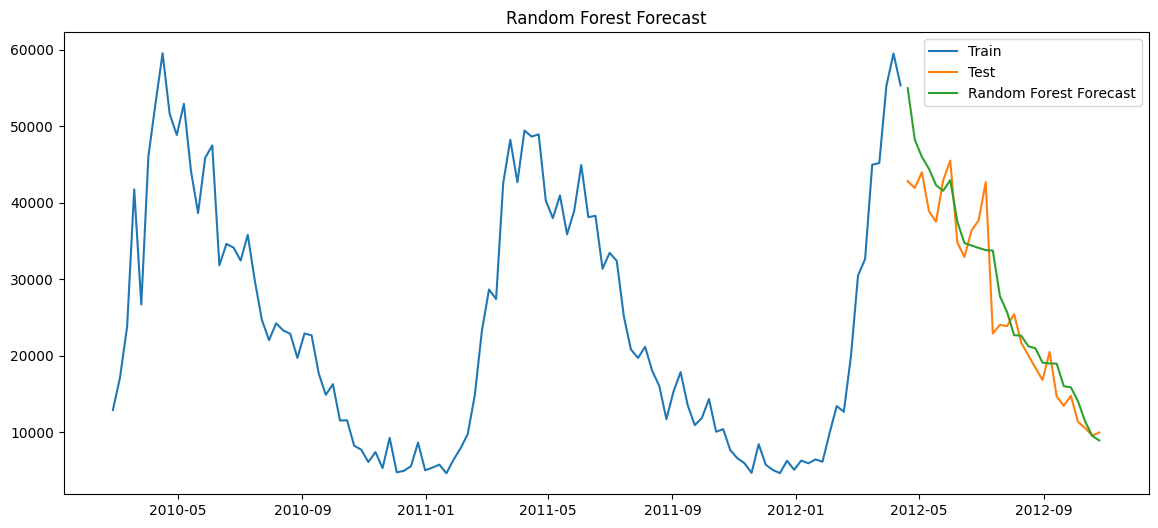

In [50]:
# Visualization
plt.figure(figsize=(14,6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_test.index, rf_preds, label='Random Forest Forecast')
plt.title('Random Forest Forecast')
plt.legend()
plt.show()


## XGBoost Regressor

In [51]:
import xgboost as xgb

In [52]:
# Training and modeling
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_preds = xgb_model.predict(x_test)

In [53]:
# Evaluation
xgb_rmse = math.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)

print(f"XGBoost RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}")

# Appened the results to the dic
results['XGBoost'] = {'RMSE': xgb_rmse, 'MAE': xgb_mae}

XGBoost RMSE: 4893.36, MAE: 3781.07


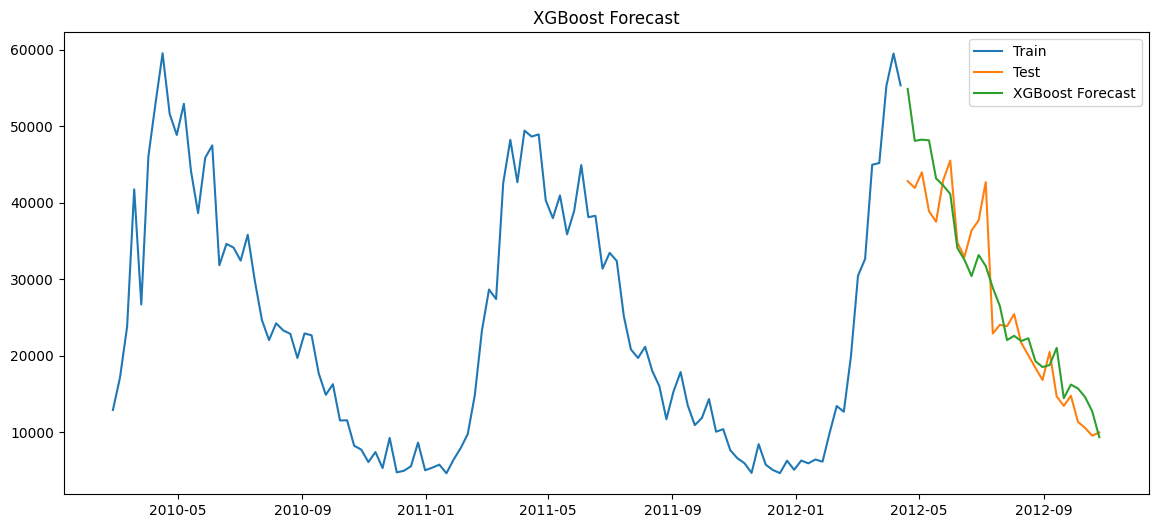

In [54]:
# Visualization
plt.figure(figsize=(14,6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_test.index, xgb_preds, label='XGBoost Forecast')
plt.title('XGBoost Forecast')
plt.legend()
plt.show()

## LightGBM Regressor


In [55]:
import lightgbm as lgb

In [56]:
# Training and predicting
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(x_train, y_train)
lgb_preds = lgb_model.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 13
[LightGBM] [Info] Start training from score 23768.649776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [57]:
# Evaluation
lgb_rmse = math.sqrt(mean_squared_error(y_test, lgb_preds))
lgb_mae = mean_absolute_error(y_test, lgb_preds)

print(f"LightGBM RMSE: {lgb_rmse:.2f}, MAE: {lgb_mae:.2f}")

# Appened the results to the dic
results['LightGBM'] = {'RMSE': lgb_rmse, 'MAE': lgb_mae}

LightGBM RMSE: 5088.06, MAE: 3830.01


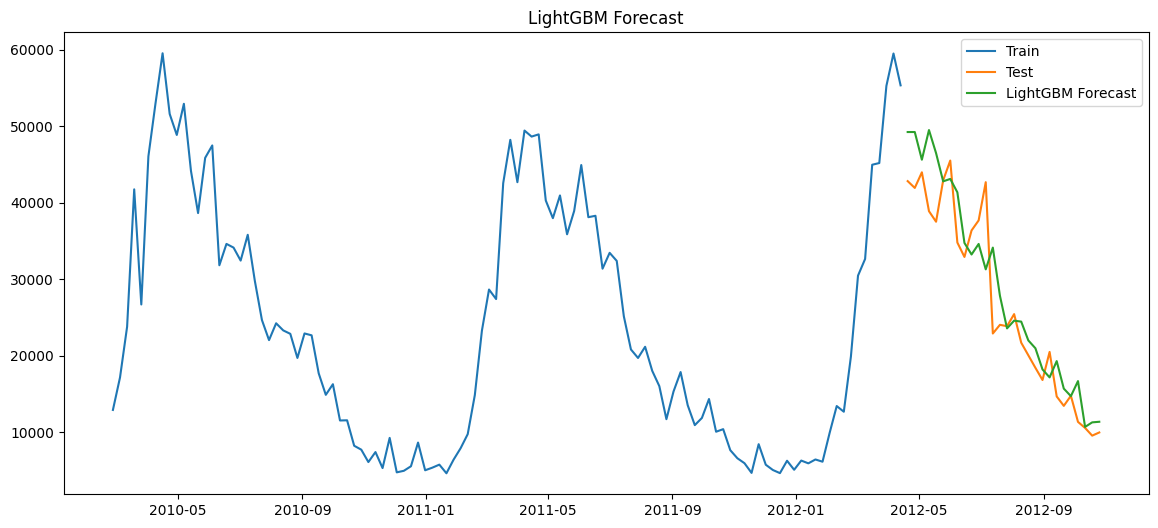

In [58]:
# Visualization
plt.figure(figsize=(14,6))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_test.index, lgb_preds, label='LightGBM Forecast')
plt.title('LightGBM Forecast')
plt.legend()
plt.show()

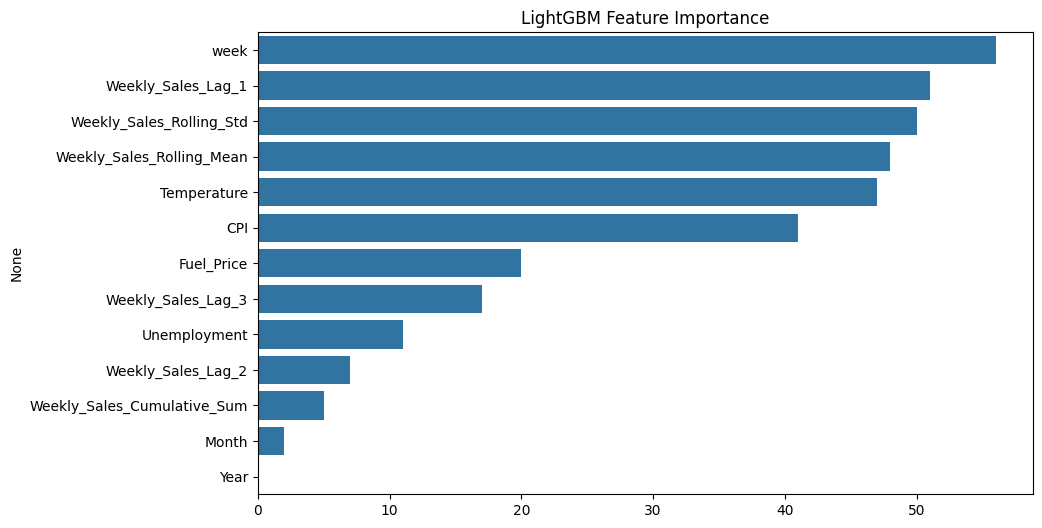

In [59]:
# Plot feature importance
import seaborn as sns

feature_importance = pd.Series(lgb_model.feature_importances_, index=x.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('LightGBM Feature Importance')
plt.show()



# Deep Learning Models

In [60]:
# Neural networks require all features to be normalized
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [61]:
x = df_ml.drop(['Weekly_Sales'], axis=1)
y = df_ml['Weekly_Sales']

In [62]:
# Create scalers
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Fit and transform
x_scaled = X_scaler.fit_transform(x)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

x_scaled.shape

(140, 15)

In [63]:
y_scaled.shape

(140, 1)

In [64]:
# Re-split scaled data
split_idx = int(len(x_scaled) * 0.8)

X_train_scaled = x_scaled[:split_idx]
X_test_scaled = x_scaled[split_idx:]

y_train_scaled = y_scaled[:split_idx]
y_test_scaled = y_scaled[split_idx:]

X_train_scaled.shape

(112, 15)

In [65]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [66]:
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

X_test_tensor shape: torch.Size([28, 15])
y_test_tensor shape: torch.Size([28, 1])


In [67]:
print(X_train_tensor.min(), X_train_tensor.max())  # should be between 0 and 1
print(y_train_tensor.min(), y_train_tensor.max())  # should also be between 0 and 1


tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


## ANN

In [68]:
import torch.nn as nn

class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = ANNModel(input_size=X_train_tensor.shape[1])

In [69]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 30
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        preds = model(xb).squeeze()
        loss = loss_fn(preds, yb.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/30, Loss: 0.5662
Epoch 2/30, Loss: 0.3719
Epoch 3/30, Loss: 0.2684
Epoch 4/30, Loss: 0.2213
Epoch 5/30, Loss: 0.1860
Epoch 6/30, Loss: 0.1724
Epoch 7/30, Loss: 0.1345
Epoch 8/30, Loss: 0.1075
Epoch 9/30, Loss: 0.0829
Epoch 10/30, Loss: 0.0651
Epoch 11/30, Loss: 0.0495
Epoch 12/30, Loss: 0.0390
Epoch 13/30, Loss: 0.0361
Epoch 14/30, Loss: 0.0345
Epoch 15/30, Loss: 0.0315
Epoch 16/30, Loss: 0.0303
Epoch 17/30, Loss: 0.0277
Epoch 18/30, Loss: 0.0268
Epoch 19/30, Loss: 0.0255
Epoch 20/30, Loss: 0.0225
Epoch 21/30, Loss: 0.0222
Epoch 22/30, Loss: 0.0219
Epoch 23/30, Loss: 0.0211
Epoch 24/30, Loss: 0.0218
Epoch 25/30, Loss: 0.0213
Epoch 26/30, Loss: 0.0198
Epoch 27/30, Loss: 0.0208
Epoch 28/30, Loss: 0.0187
Epoch 29/30, Loss: 0.0190
Epoch 30/30, Loss: 0.0180


In [70]:
model.eval()
with torch.no_grad():
    y_preds_scaled = model(X_test_tensor).numpy()

# Inverse scaling
y_preds = y_scaler.inverse_transform(y_preds_scaled)
y_true = y_scaler.inverse_transform(y_test_scaled)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

ann_rmse = math.sqrt(mean_squared_error(y_true, y_preds))
ann_mae = mean_absolute_error(y_true, y_preds)

print(f"ANN RMSE: {ann_rmse:.2f}, MAE: {ann_mae:.2f}")

# Appened to the dic
results['ANN'] = {'RMSE': ann_rmse, 'MAE': ann_mae}


ANN RMSE: 7915.09, MAE: 6506.17


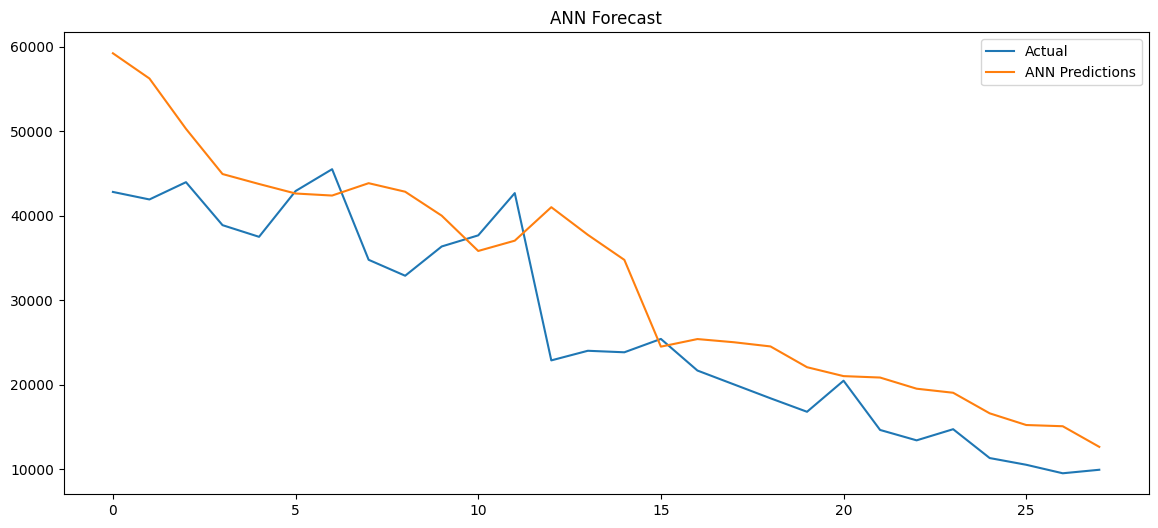

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_true, label='Actual')
plt.plot(y_preds, label='ANN Predictions')
plt.title('ANN Forecast')
plt.legend()
plt.show()


# LSTM

In [72]:
import numpy as np

In [73]:
#  create_sequences first
def create_sequences(X, y, lookback=5):
    Xs, ys = [], []
    for i in range(lookback, len(X)):
        Xs.append(X[i - lookback:i])  # shape: (lookback, features)
        ys.append(y[i])               # shape: (1,)
    return np.array(Xs), np.array(ys)

lookback = 5
X_seq, y_seq = create_sequences(x_scaled, y_scaled, lookback)


In [74]:
split_idx = int(len(X_seq) * 0.8)

X_train_seq = X_seq[:split_idx]
X_test_seq = X_seq[split_idx:]
y_train_seq = y_seq[:split_idx]
y_test_seq = y_seq[split_idx:]


In [75]:
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_seq, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_seq, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [76]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])
        return out

model = LSTMModel(input_size=X_train_tensor.shape[2])

In [77]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 30
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        preds = model(xb).squeeze()
        loss = loss_fn(preds, yb.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/30, Loss: 1.1587
Epoch 2/30, Loss: 0.8525
Epoch 3/30, Loss: 0.5603
Epoch 4/30, Loss: 0.3427
Epoch 5/30, Loss: 0.3871
Epoch 6/30, Loss: 0.3409
Epoch 7/30, Loss: 0.2528
Epoch 8/30, Loss: 0.2186
Epoch 9/30, Loss: 0.1876
Epoch 10/30, Loss: 0.1567
Epoch 11/30, Loss: 0.1492
Epoch 12/30, Loss: 0.1023
Epoch 13/30, Loss: 0.0862
Epoch 14/30, Loss: 0.0780
Epoch 15/30, Loss: 0.0894
Epoch 16/30, Loss: 0.0661
Epoch 17/30, Loss: 0.0521
Epoch 18/30, Loss: 0.0473
Epoch 19/30, Loss: 0.0457
Epoch 20/30, Loss: 0.0423
Epoch 21/30, Loss: 0.0396
Epoch 22/30, Loss: 0.0349
Epoch 23/30, Loss: 0.0377
Epoch 24/30, Loss: 0.0335
Epoch 25/30, Loss: 0.0342
Epoch 26/30, Loss: 0.0346
Epoch 27/30, Loss: 0.0330
Epoch 28/30, Loss: 0.0318
Epoch 29/30, Loss: 0.0308
Epoch 30/30, Loss: 0.0300


In [78]:
model.eval()
predictions = []

with torch.no_grad():
    for xb, _ in test_loader:
        preds = model(xb)
        predictions.extend(preds.cpu().numpy().flatten())

# Rescale
y_pred_scaled = np.array(predictions).reshape(-1, 1)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))

# Metrics
lstm_rmse = math.sqrt(mean_squared_error(y_true, y_pred))
lstm_mae = mean_absolute_error(y_true, y_pred)

print(f"LSTM RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}")

# Append to the dic
results['LSTM'] = {'RMSE': lstm_rmse, 'MAE': lstm_mae}

LSTM RMSE: 6436.31, MAE: 5007.33


## CNN

In [79]:
class CNNModel(nn.Module):
    def __init__(self, input_size):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=2)
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # [B, Features, Seq]
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

In [80]:
def train_model(model, train_loader, epochs=30):
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for xb, yb in train_loader:
            preds = model(xb).squeeze()
            loss = loss_fn(preds, yb.squeeze())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


In [81]:
def evaluate_model(model, test_loader, y_test_tensor, y_scaler, label):
    model.eval()
    predictions = []
    with torch.no_grad():
        for xb, _ in test_loader:
            preds = model(xb)
            predictions.extend(preds.cpu().numpy().flatten())

    y_pred_scaled = np.array(predictions).reshape(-1, 1)
    y_pred = y_scaler.inverse_transform(y_pred_scaled)
    y_true = y_scaler.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))

    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{label} RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    results[label] = {'RMSE': rmse, 'MAE': mae}

    return rmse, mae

In [82]:
cnn_model = CNNModel(input_size=X_train_tensor.shape[2])

train_model(cnn_model, train_loader)
cnn_rmse, cnn_mae = evaluate_model(cnn_model, test_loader, y_test_tensor, y_scaler, 'CNN')

# Append to dic
results['CNN'] = {'RMSE': cnn_rmse, 'MAE': cnn_mae}

Epoch 1/30, Loss: 0.4044
Epoch 2/30, Loss: 0.3454
Epoch 3/30, Loss: 0.2597
Epoch 4/30, Loss: 0.2268
Epoch 5/30, Loss: 0.1781
Epoch 6/30, Loss: 0.1280
Epoch 7/30, Loss: 0.1040
Epoch 8/30, Loss: 0.0941
Epoch 9/30, Loss: 0.0867
Epoch 10/30, Loss: 0.0902
Epoch 11/30, Loss: 0.0777
Epoch 12/30, Loss: 0.0663
Epoch 13/30, Loss: 0.0632
Epoch 14/30, Loss: 0.0628
Epoch 15/30, Loss: 0.0520
Epoch 16/30, Loss: 0.0589
Epoch 17/30, Loss: 0.0511
Epoch 18/30, Loss: 0.0520
Epoch 19/30, Loss: 0.0442
Epoch 20/30, Loss: 0.0444
Epoch 21/30, Loss: 0.0398
Epoch 22/30, Loss: 0.0413
Epoch 23/30, Loss: 0.0363
Epoch 24/30, Loss: 0.0348
Epoch 25/30, Loss: 0.0319
Epoch 26/30, Loss: 0.0340
Epoch 27/30, Loss: 0.0332
Epoch 28/30, Loss: 0.0314
Epoch 29/30, Loss: 0.0285
Epoch 30/30, Loss: 0.0263
CNN RMSE: 6760.67, MAE: 5343.04


## RNN

In [83]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, hn = self.rnn(x)
        out = self.fc(hn[-1])
        return out


In [84]:
rnn_model = RNNModel(input_size=X_train_tensor.shape[2])
train_model(rnn_model, train_loader)
rnn_rmse, rnn_mae = evaluate_model(rnn_model, test_loader, y_test_tensor, y_scaler, 'RNN')


# append to dic
results['RNN'] = {'RMSE': rnn_rmse, 'MAE': rnn_mae}

Epoch 1/30, Loss: 0.6980
Epoch 2/30, Loss: 0.2895
Epoch 3/30, Loss: 0.2589
Epoch 4/30, Loss: 0.1503
Epoch 5/30, Loss: 0.1076
Epoch 6/30, Loss: 0.1129
Epoch 7/30, Loss: 0.0819
Epoch 8/30, Loss: 0.0800
Epoch 9/30, Loss: 0.0701
Epoch 10/30, Loss: 0.0645
Epoch 11/30, Loss: 0.0515
Epoch 12/30, Loss: 0.0488
Epoch 13/30, Loss: 0.0416
Epoch 14/30, Loss: 0.0331
Epoch 15/30, Loss: 0.0319
Epoch 16/30, Loss: 0.0317
Epoch 17/30, Loss: 0.0325
Epoch 18/30, Loss: 0.0307
Epoch 19/30, Loss: 0.0284
Epoch 20/30, Loss: 0.0280
Epoch 21/30, Loss: 0.0247
Epoch 22/30, Loss: 0.0261
Epoch 23/30, Loss: 0.0235
Epoch 24/30, Loss: 0.0240
Epoch 25/30, Loss: 0.0238
Epoch 26/30, Loss: 0.0224
Epoch 27/30, Loss: 0.0226
Epoch 28/30, Loss: 0.0247
Epoch 29/30, Loss: 0.0217
Epoch 30/30, Loss: 0.0225
RNN RMSE: 6529.19, MAE: 4802.71


## GRU

In [85]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, hn = self.gru(x)

        out = self.fc(hn[-1])
        return out


In [86]:
gru_model = GRUModel(input_size=X_train_tensor.shape[2])
train_model(gru_model, train_loader)
gru_rmse, gru_mae = evaluate_model(gru_model, test_loader, y_test_tensor, y_scaler, 'GRU')

# append to dic
results['GRU'] = {'RMSE': gru_rmse, 'MAE': gru_mae}

Epoch 1/30, Loss: 0.8541
Epoch 2/30, Loss: 0.4298
Epoch 3/30, Loss: 0.3021
Epoch 4/30, Loss: 0.2731
Epoch 5/30, Loss: 0.1967
Epoch 6/30, Loss: 0.1470
Epoch 7/30, Loss: 0.1208
Epoch 8/30, Loss: 0.0747
Epoch 9/30, Loss: 0.0666
Epoch 10/30, Loss: 0.0535
Epoch 11/30, Loss: 0.0575
Epoch 12/30, Loss: 0.0469
Epoch 13/30, Loss: 0.0418
Epoch 14/30, Loss: 0.0370
Epoch 15/30, Loss: 0.0360
Epoch 16/30, Loss: 0.0454
Epoch 17/30, Loss: 0.0337
Epoch 18/30, Loss: 0.0331
Epoch 19/30, Loss: 0.0335
Epoch 20/30, Loss: 0.0353
Epoch 21/30, Loss: 0.0334
Epoch 22/30, Loss: 0.0281
Epoch 23/30, Loss: 0.0310
Epoch 24/30, Loss: 0.0294
Epoch 25/30, Loss: 0.0295
Epoch 26/30, Loss: 0.0264
Epoch 27/30, Loss: 0.0277
Epoch 28/30, Loss: 0.0257
Epoch 29/30, Loss: 0.0264
Epoch 30/30, Loss: 0.0248
GRU RMSE: 5867.27, MAE: 4843.31


# Prophet

In [87]:
!pip install prophet

In [88]:
# data preparation
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_prophet = df_dept.copy()
df_prophet['ds'] = df_prophet.index
df_prophet.rename(columns={'Weekly_Sales': 'y'}, inplace=True)

regressors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']


In [89]:
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:train_size].copy()
test_df = df_prophet.iloc[train_size:].copy()


In [90]:
m = Prophet()

for reg in regressors:
    m.add_regressor(reg)

m.fit(train_df[['ds', 'y'] + regressors])


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2z1tknes/aljvqxjc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2z1tknes/1r8_tm_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9474', 'data', 'file=/tmp/tmp2z1tknes/aljvqxjc.json', 'init=/tmp/tmp2z1tknes/1r8_tm_z.json', 'output', 'file=/tmp/tmp2z1tknes/prophet_modelnq9dm4xi/prophet_model-20250627141838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [91]:

future = test_df[['ds'] + regressors]
forecast = m.predict(future)

In [92]:
y_true = test_df['y'].values
y_pred = forecast['yhat'].values

prophet_rmse = math.sqrt(mean_squared_error(y_true, y_pred))
prophet_mae = mean_absolute_error(y_true, y_pred)

print(f"Prophet RMSE: {prophet_rmse:.2f}, MAE: {prophet_mae:.2f}")

results['Prophet'] = {'RMSE': prophet_rmse, 'MAE': prophet_mae}


Prophet RMSE: 9825.45, MAE: 9147.79


# Innovative Technique

## TFT

In [95]:
!pip install pytorch-lightning pytorch-forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.1/821.1 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [96]:
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer

df_tft = df_dept.copy()

# Reset index to move 'Date' from index to column
df_tft = df_tft.reset_index()

# Remove duplicate Date column if exists
if df_tft.columns.duplicated().any():
    df_tft = df_tft.loc[:, ~df_tft.columns.duplicated()]

# Sort by Date and assign time_idx
df_tft['Date'] = pd.to_datetime(df_tft['Date'])
df_tft = df_tft.sort_values("Date").reset_index(drop=True)
df_tft['time_idx'] = df_tft.index
df_tft["id"] = "Dept_16"

In [97]:
target = "Weekly_Sales"
time_varying_known_reals = ['time_idx', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
time_varying_unknown_reals = [target]
group_ids = ["id"]

max_encoder_length = 30
max_prediction_length = 7
training_cutoff = df_tft["time_idx"].max() - max_prediction_length

In [98]:
training = TimeSeriesDataSet(
    df_tft[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target=target,
    group_ids=group_ids,
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=time_varying_unknown_reals,
    target_normalizer=GroupNormalizer(groups=["id"]),
    allow_missing_timesteps=True
)

In [99]:
validation = TimeSeriesDataSet.from_dataset(training, df_tft, predict=True, stop_randomization=True)

In [100]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

In [101]:
!!pip install pytorch-lightning==1.6.5 pytorch-forecasting==0.10.3 --quiet

['\x1bWARNING: Ignoring version 1.6.5 of pytorch-lightning since it has invalid metadata:',
 'Requested pytorch-lightning==1.6.5 from https://files.pythonhosted.org/packages/34/de/3c98fb314e5c273a5c8bf0ff3b37e2a2625af7fb6540d9123cd5de975678/pytorch_lightning-1.6.5-py3-none-any.whl has invalid metadata: .* suffix can only be used with `==` or `!=` operators',
 '    torch (>=1.8.*)',
 '           ~~~~~~^',
 'Please use pip<24.1 if you need to use this version.\x1b\x1b',
 '\x1b\x1bERROR: Could not find a version that satisfies the requirement pytorch-lightning==1.6.5 (from versions: 0.0.2, 0.2, 0.2.2, 0.2.3, 0.2.4, 0.2.4.1, 0.2.5, 0.2.5.1, 0.2.5.2, 0.2.6, 0.3, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.3.4.1, 0.3.5, 0.3.6, 0.3.6.1, 0.3.6.3, 0.3.6.4, 0.3.6.5, 0.3.6.6, 0.3.6.7, 0.3.6.8, 0.3.6.9, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.5.0, 0.5.1, 0.5.1.2, 0.5.1.3, 0.5.2, 0.5.2.1, 0.5.3, 0.5.3.1, 0.5.3.2, 0.5.3.3, 0.6.0, 0.7.1, 0.7.3, 0.7.5, 0.7.6, 0.8.1, 0.8.3, 0.8.4, 0.8

In [102]:
from pytorch_forecasting import TemporalFusionTransformer
from pytorch_forecasting.metrics import RMSE
from pytorch_lightning import Trainer

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    loss=RMSE(),
    log_interval=10,
    reduce_on_plateau_patience=4
)

trainer = Trainer(
    max_epochs=30,
    gradient_clip_val=0.1,
    enable_model_summary=True,
)

trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader
)


INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


TypeError: `model` must be a `LightningModule` or `torch._dynamo.OptimizedModule`, got `TemporalFusionTransformer`

The previous code failed due to a `TypeError` because an integer (`time_idx`) was being compared with a Timestamp (`training_cutoff`). To resolve this, the `training_cutoff` is now explicitly converted to an integer before being used in the lambda function for filtering the DataFrame.

In [103]:
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.data.encoders import NaNLabelEncoder

max_encoder_length = 5
max_prediction_length = 7

training_data = df_nbeats.iloc[:int(len(df_nbeats) * 0.8)]
# Convert training_cutoff to integer
training_cutoff = int(training_data["time_idx"].max()) - max_prediction_length


training = TimeSeriesDataSet(
    df_nbeats[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target=target,
    group_ids=group_ids,
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_reals=time_varying_unknown_reals,
    target_normalizer=NaNLabelEncoder(),
    allow_missing_timesteps=True,
)

validation = TimeSeriesDataSet.from_dataset(training, df_nbeats, predict=True, stop_randomization=True)

NameError: name 'df_nbeats' is not defined

In [104]:
print(results)

{'Random Forest': {'RMSE': 4451.921091093782, 'MAE': 3356.855796428571}, 'XGBoost': {'RMSE': 4893.358098472972, 'MAE': 3781.071114676339}, 'LightGBM': {'RMSE': 5088.063802869538, 'MAE': 3830.010626928069}, 'ANN': {'RMSE': 7915.088059219886, 'MAE': 6506.173137555803}, 'LSTM': {'RMSE': 6436.311055255176, 'MAE': 5007.33447265625}, 'CNN': {'RMSE': 6760.665056042933, 'MAE': 5343.041015625}, 'RNN': {'RMSE': 6529.185554110099, 'MAE': 4802.71142578125}, 'GRU': {'RMSE': 5867.268188859275, 'MAE': 4843.30712890625}, 'Prophet': {'RMSE': 9825.451186055972, 'MAE': 9147.790922468046}}


In [105]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv("model_evaluation_results.csv")

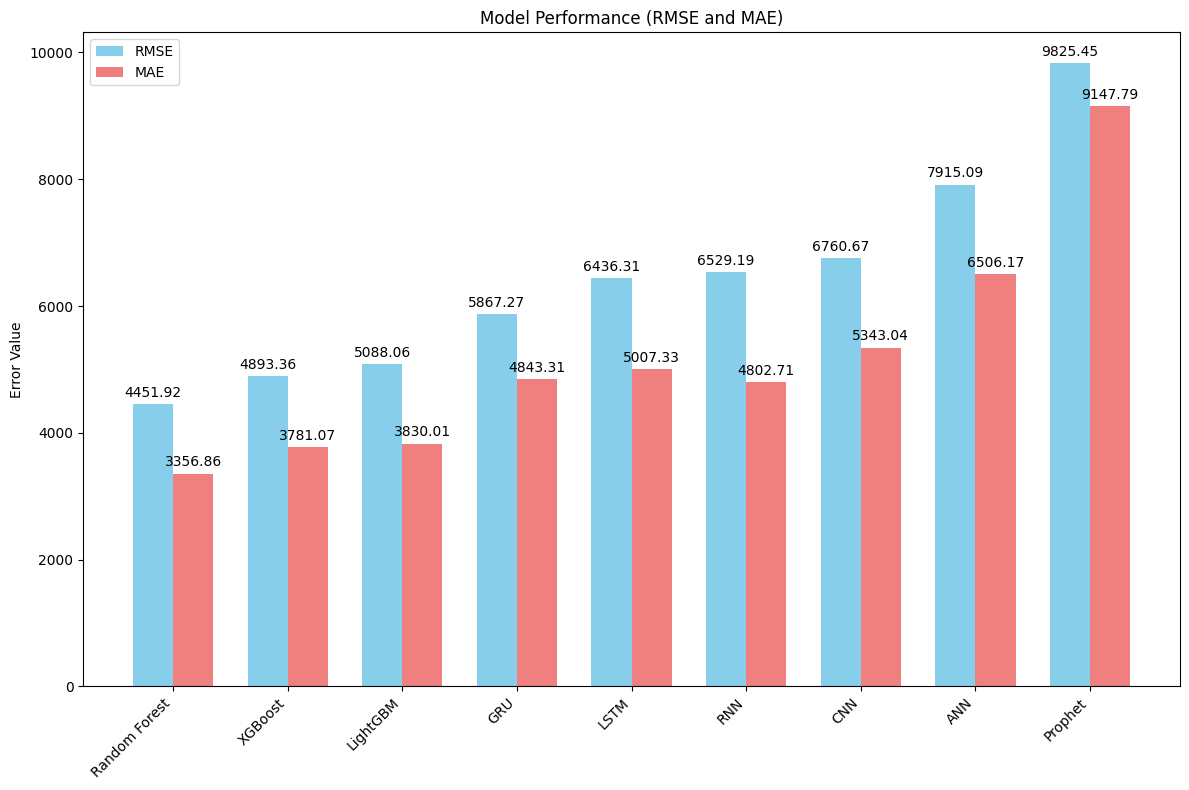

In [109]:
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.sort_values(by='RMSE', ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(results_df.index))
width = 0.35
rects1 = ax.bar(x - width/2, results_df['RMSE'], width, label='RMSE', color='skyblue')
rects2 = ax.bar(x + width/2, results_df['MAE'], width, label='MAE', color='lightcoral')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylabel('Error Value')
ax.set_title('Model Performance (RMSE and MAE)')
ax.set_xticks(x)
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()


In [110]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')

print("Random Forest model saved as random_forest_model.pkl")

Random Forest model saved as random_forest_model.pkl
